## Step 1: MTI Dataset

The very first step is started by reading the data from as CSV file using Pandas library. Then a primary data exploration step is being done to find out any missing categories and the distribution for each type of indicator (I/E, N/S, T/F, J/P).

In [1]:
import pandas as pd


datastore_Path = "C:/Users/Shaya/Desktop/Ryerson/Sync/CIND820/Dataset/(MBTI) Myers-Briggs Personality Type Dataset/mbti_1.csv"

pd.set_option('display.max_colwidth', 500)
mbti_Dataset = pd.read_csv(datastore_Path,  sep=",", header = 0, encoding = 'unicode_escape')
mbti_Dataset.columns = ['Type','Posts']
mbti_Dataset.head()

,Type,Posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...


### 1-1 : High level data exploration

In [2]:
#What is the shaper of our dataset:
print("Dataset has {} rows and {} columns".format(len(mbti_Dataset), len(mbti_Dataset.columns)),'\n')

#Personality Type variation on the Dataset
print('Number of each personality type:', dict(mbti_Dataset.value_counts(subset='Type')),'\n')

#How many missing data are in the Dataset:
print('Number of missing values in personality Type: {}'.format(mbti_Dataset['Type'].isnull().sum()))
print('Number of missing values in Posts: {}'.format(mbti_Dataset['Posts'].isnull().sum()))

Dataset has 8675 rows and 2 columns 

Number of each personality type: {'INFP': 1832, 'INFJ': 1470, 'INTP': 1304, 'INTJ': 1091, 'ENTP': 685, 'ENFP': 675, 'ISTP': 337, 'ISFP': 271, 'ENTJ': 231, 'ISTJ': 205, 'ENFJ': 190, 'ISFJ': 166, 'ESTP': 89, 'ESFP': 48, 'ESFJ': 42, 'ESTJ': 39} 

Number of missing values in personality Type: 0
Number of missing values in Posts: 0


<AxesSubplot:ylabel='Type'>

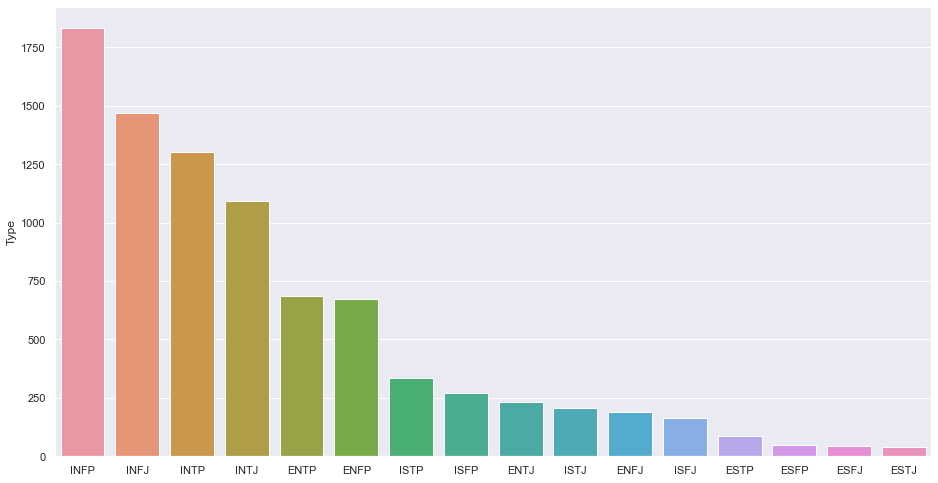

In [3]:
import seaborn as sns

graph = mbti_Dataset.value_counts(subset='Type')
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x=mbti_Dataset.Type.value_counts().index, y=mbti_Dataset.Type.value_counts())


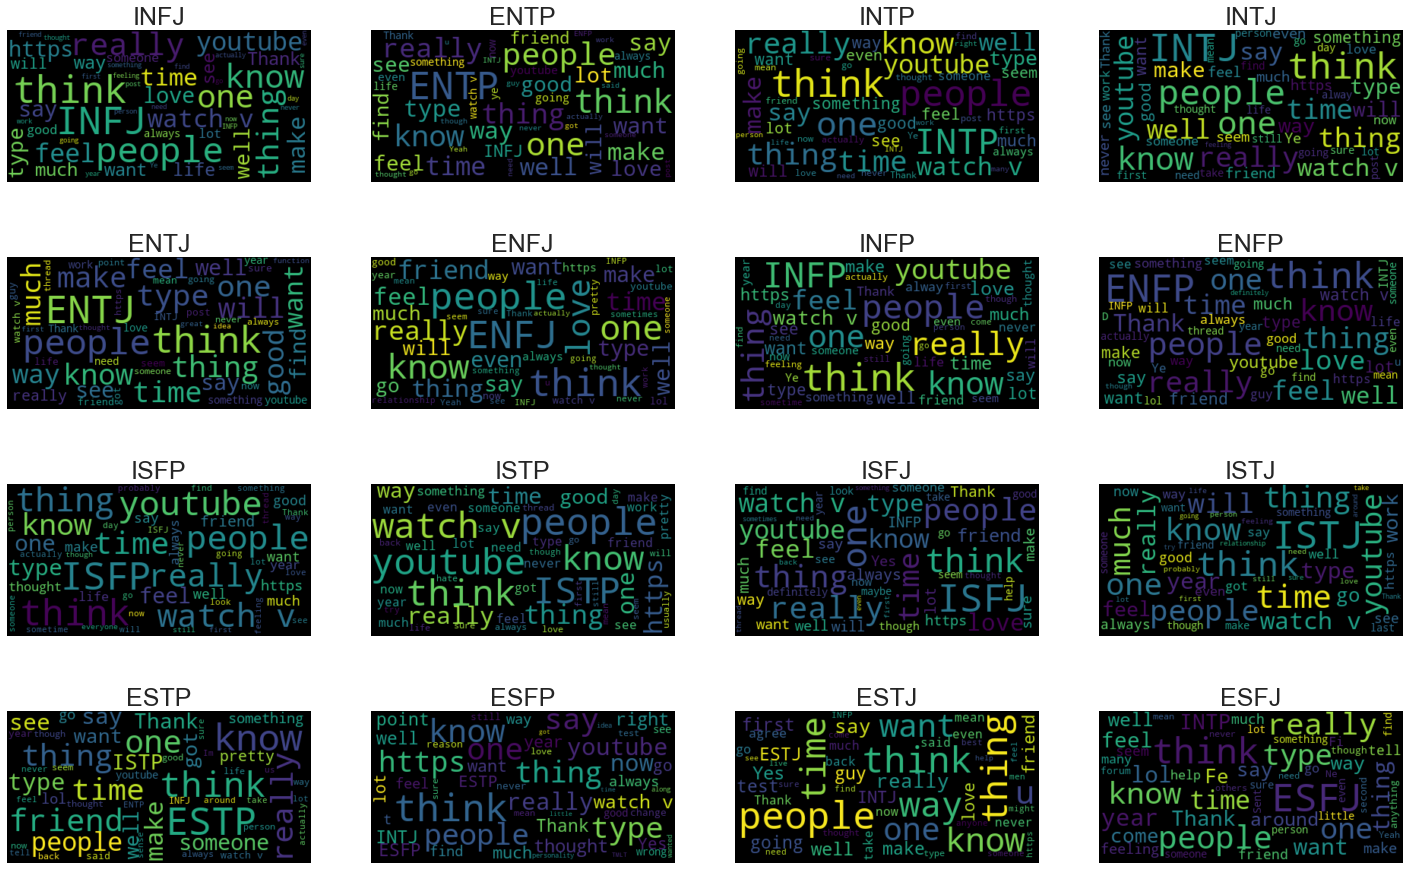

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

type_Number = len(mbti_Dataset['Type'].unique())
fig, ax = plt.subplots(type_Number, figsize=(25,type_Number))
i = 0
for t in mbti_Dataset['Type'].unique():
    temp_Df = mbti_Dataset[mbti_Dataset['Type'] == t]
    WC = WordCloud(background_color="black", max_words=50, max_font_size=50).generate(temp_Df['Posts'].to_string())
    plt.subplot(4,4,i+1)
    plt.title(label = t, fontsize=25)
    plt.axis("off")
    plt.imshow(WC, interpolation='bilinear')
    i+=1

### 1-2: Split each Type into it's categories.

In [5]:
mbti_Dataset['IE'] = None
mbti_Dataset['NS'] = None
mbti_Dataset['FT'] = None
mbti_Dataset['PJ'] = None

for i, t in enumerate(mbti_Dataset.Type):
    if 'I' in t:
        mbti_Dataset['IE'][i] = 'I'
    elif 'E' in t:
        mbti_Dataset['IE'][i] = 'E'

    if 'N' in t:
        mbti_Dataset['NS'][i] = 'N'
    elif 'S' in t:
        mbti_Dataset['NS'][i] = 'S'

    if 'F' in t:
        mbti_Dataset['FT'][i] = 'F'
    elif 'T' in t:
        mbti_Dataset['FT'][i] = 'T'

    if 'P' in t:
        mbti_Dataset['PJ'][i] = 'P'
    elif 'J' in t:
        mbti_Dataset['PJ'][i] = 'J'

mbti_Dataset.head()

,Type,Posts,IE,NS,FT,PJ
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...,E,N,T,P
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...",I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...,E,N,T,J


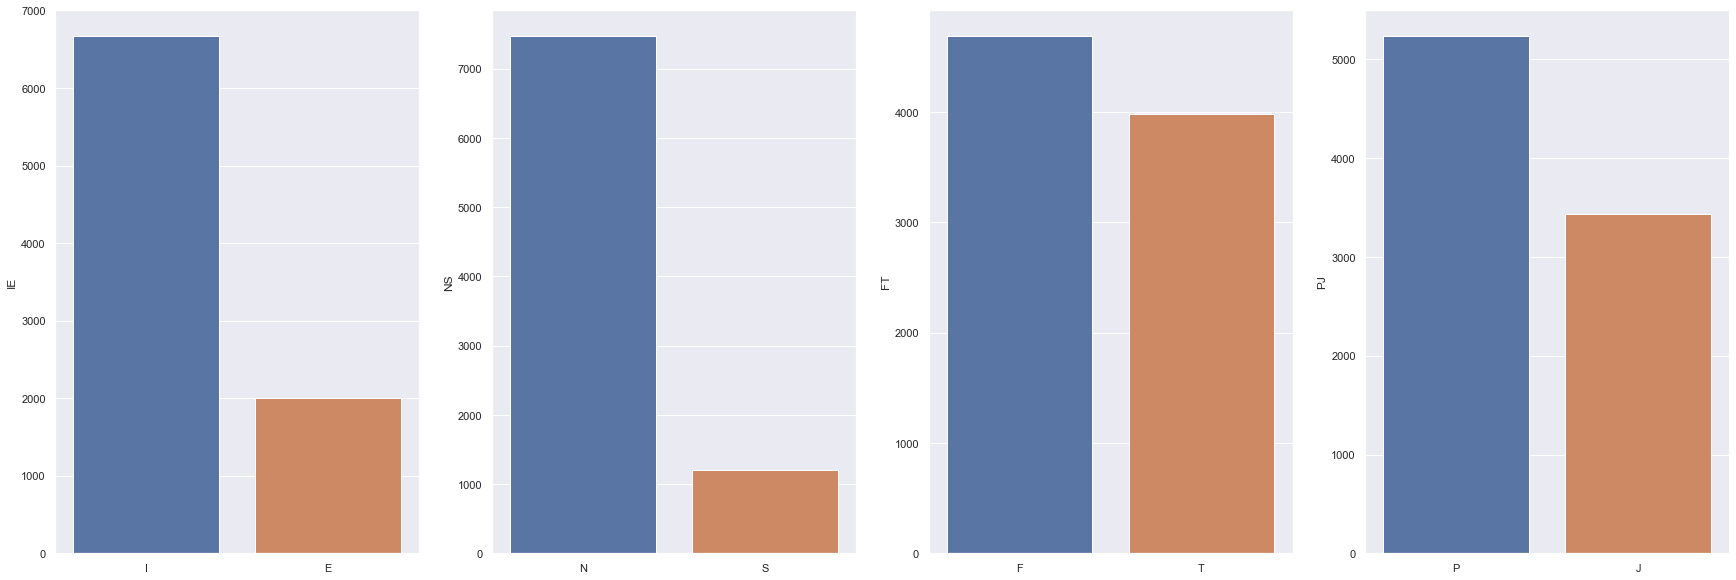

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

category_List = ['IE', 'NS', 'FT', 'PJ']

fig, axes = plt.subplots(1,4, figsize=(30,10))
sns.set_theme(style="whitegrid")
for i, category in enumerate(category_List):
    sns.barplot(ax=axes[i], x=mbti_Dataset[category].value_counts().index, y=mbti_Dataset[category].value_counts())